In [10]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm


<IPython.core.display.Javascript object>


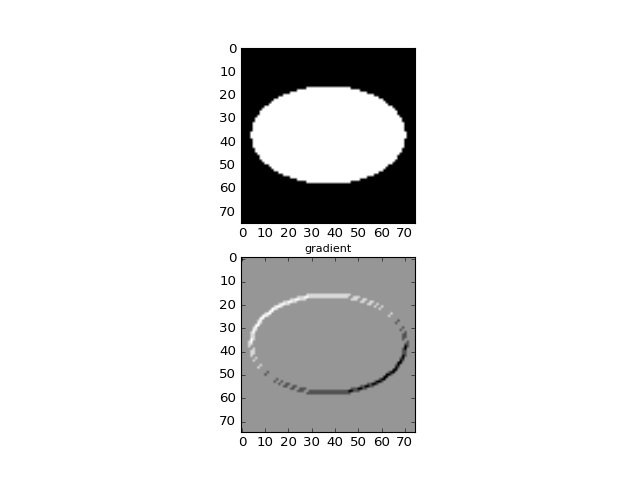

In [33]:
#part A: plots the gradient of some scalar function (ellipse in 2D)
space_plot=5
space_density=15
space_array = np.linspace(-space_plot,space_plot,space_plot*space_density)

def ellipse(x, y, r):
    if((x**2)/2 + (y**2)/5 <= r**2):
        return 1
    else:
        return 0

def CreateEllipse(space_array, r):
    ellipseSpace = np.zeros((len(space_array), len(space_array)))
    for x in range(0, len(space_array)):
        for y in range(0, len(space_array)):
            ellipseSpace[x][y] = ellipse(space_array[x], space_array[y], r)
    return ellipseSpace

ellipse = CreateEllipse(space_array ,2)
ellipse_gradient = np.gradient(ellipse)

#plot

ellipse_fig= plt.figure()

ellipse_subfig = ellipse_fig.add_subplot(2,1,1)
ellipse_subfig.imshow(ellipse,cmap=cm.Greys_r)

ellipse_gradXY_subfig = ellipse_fig.add_subplot(2,1,2)
ellipse_gradXY_subfig.set_title("gradient",fontsize=10)
ellipse_gradXY_subfig.imshow(ellipse_gradient[0]+ellipse_gradient[1],cmap=cm.Greys_r)

ellipse_fig.show()

In [ ]:
#part B: plot simulating the propagation of an electromagnetic wave through a vacuum

# FS wave propagation plots using solution to Helmholtz, 2015-11-23
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


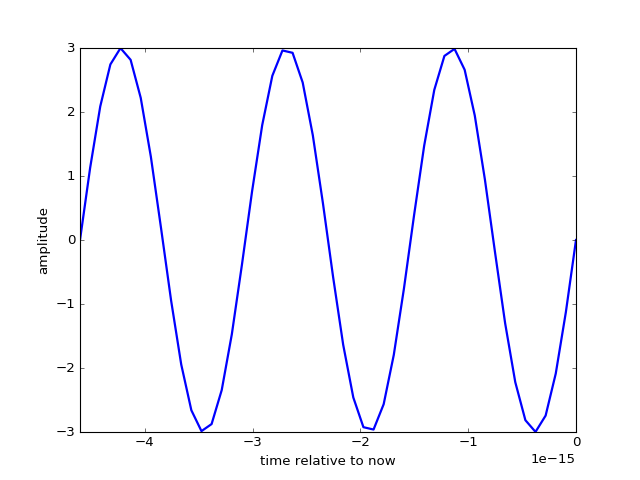

In [40]:
c = 299792458    #speed of the light in a vacuum. m/s.
wavelength = 460e-9 # Green, 577 to 492 nm. Blue, 492 to 455 nm. Violet, 455 to 390 nm
nu = c / wavelength #frequency = oscillation periods per unit time

threewavetime = 3*wavelength / c

samples = 50 #the more samples here, the more smooth the wave will show
timelist = np.linspace(0, threewavetime, samples)

clocklist = timelist

amplitude = 3.0
phase = np.pi *1/2

#make a phasor(U(p) = A(p)exp[+j*phase]
U_p = amplitude * np.e**(1j*phase)

#Solution of Helmholtz for wave height at various times == wave propagation in phasor notation
def u_p(time):
    return (U_p * np.e**(-1j*2*np.pi*nu*time)).real

fig = plt.figure()
ax =  plt.axes(xlim=(-threewavetime,0), ylim=(-amplitude, +amplitude))
ax.set_xlabel('time relative to now')
ax.set_ylabel('amplitude')

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame

def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially

def animate(i):
    waveheight = u_p(clocklist[i]-timelist)
    line.set_data(-timelist, waveheight)                   
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=samples, interval=20, blit=True, repeat=False)
plt.show()
